# Let's Get Familiar with PSG Data

In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir('..')

from pathlib import Path
import matplotlib.pyplot as plt
import pprint

import numpy as np
from PIL import Image

from openpsg.utils.vis_tools.datasets import coco_dir
from openpsg.utils.vis_tools.preprocess import load_json

from detectron2.data.detection_utils import read_image
from detectron2.utils.colormap import colormap
from panopticapi.utils import rgb2id

def get_colormap(num_colors: int):
    return (np.resize(colormap(), (num_colors, 3))).tolist()

/home/mingzhe/miniconda3/envs/ce7454/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Loading PSG Data

This script help users to get familiar with PSG data.
All PSG annotations are stored in `psg.json`.
We also provide `tiny_psg.json`, which contains 1/4 size of original training and 1000 val samples to accelerate debugging process.
We first load `psg.json`.

In [2]:
# set working path as home dir to easy access data
psg_dataset_file = load_json(Path("/home/mingzhe/Projects/OpenPSG/ce7454/data/psg/psg_cls_advanced.json"))
print('keys: ', list(psg_dataset_file.keys()))

keys:  ['data', 'thing_classes', 'stuff_classes', 'predicate_classes', 'test_image_ids', 'train_image_ids', 'val_image_ids']


You can see that psg_dataset_file contains the label system represented by 'thing_classes', 'stuff_classes', 'predicate_classes'.
'test_image_ids' shows the index for test (in fact validation set). Some details are as below.

In [3]:
psg_thing_cats = psg_dataset_file['thing_classes']
psg_stuff_cats = psg_dataset_file['stuff_classes']
psg_obj_cats = psg_thing_cats + psg_stuff_cats
psg_rel_cats = psg_dataset_file['predicate_classes']
psg_dataset = {d["image_id"]: d for d in psg_dataset_file['data']}
# psg_dataset_coco_id = {d["coco_image_id"]: d for d in psg_dataset_file['data']}

print('Number of images: {}'.format(len(psg_dataset)))
print('# Object Classes: {}'.format(len(psg_obj_cats)))
print('# Relation Classes: {}'.format(len(psg_rel_cats)))

Number of images: 5500
# Object Classes: 133
# Relation Classes: 56


In [4]:
psg_obj_cats[24]

'backpack'

## Visualize PSG data

In [5]:
example_img_id = '2324911'
data = psg_dataset[example_img_id]
print('keys: ', list(psg_dataset[example_img_id].keys()))

keys:  ['file_name', 'height', 'width', 'image_id', 'pan_seg_file_name', 'segments_info', 'relations', 'location', 'weather', 'annotations', 'coco_image_id']


In [6]:
# first check values other than ['pan_seg_file_name', 'segments_info', 'relations', 'annotations']
data_simple = {}
for k in data:
    if k not in ['segments_info', 'relations', 'annotations']:
        data_simple[k] = data[k]
pprint.pprint(data_simple)

{'coco_image_id': '2842',
 'file_name': 'train2017/000000002842.jpg',
 'height': 480,
 'image_id': '2324911',
 'location': '',
 'pan_seg_file_name': 'panoptic_train2017/000000002842.png',
 'weather': '',
 'width': 640}


In [7]:
pprint.pprint(data['segments_info'])

[{'area': 928, 'category_id': 0, 'id': 7370129, 'iscrowd': 0, 'isthing': 1},
 {'area': 381, 'category_id': 0, 'id': 11315124, 'iscrowd': 0, 'isthing': 1},
 {'area': 1570,
  'attribute_ids': [],
  'category_id': 0,
  'gqa_category_id': 868,
  'id': 5075850,
  'iscrowd': 0,
  'isthing': 1},
 {'area': 940, 'category_id': 0, 'id': 9143182, 'iscrowd': 0, 'isthing': 1},
 {'area': 1637, 'category_id': 0, 'id': 11577777, 'iscrowd': 0, 'isthing': 1},
 {'area': 1523,
  'attribute_ids': [],
  'category_id': 0,
  'gqa_category_id': 1084,
  'id': 6771812,
  'iscrowd': 0,
  'isthing': 1},
 {'area': 2102,
  'attribute_ids': [512],
  'category_id': 0,
  'gqa_category_id': 1028,
  'id': 5856364,
  'iscrowd': 0,
  'isthing': 1},
 {'area': 15966, 'category_id': 0, 'id': 5394516, 'iscrowd': 0, 'isthing': 1},
 {'area': 18861,
  'attribute_ids': [],
  'category_id': 0,
  'gqa_category_id': 1084,
  'id': 4804228,
  'iscrowd': 0,
  'isthing': 1},
 {'area': 1389, 'category_id': 0, 'id': 11183795, 'iscrowd': 0,

In [8]:
pprint.pprint(data['annotations'])

[{'bbox': [228.0, 138.0, 261.0, 188.0], 'bbox_mode': 0, 'category_id': 0},
 {'bbox': [179.0, 149.0, 212.0, 193.0], 'bbox_mode': 0, 'category_id': 0},
 {'bbox': [354.0, 226.0, 420.0, 268.0], 'bbox_mode': 0, 'category_id': 0},
 {'bbox': [180.0, 166.0, 210.0, 225.0], 'bbox_mode': 0, 'category_id': 0},
 {'bbox': [259.0, 135.0, 316.0, 194.0], 'bbox_mode': 0, 'category_id': 0},
 {'bbox': [569.0, 203.0, 625.0, 249.0], 'bbox_mode': 0, 'category_id': 0},
 {'bbox': [225.0, 12.0, 277.0, 134.0], 'bbox_mode': 0, 'category_id': 0},
 {'bbox': [103.0, 111.0, 215.0, 455.0], 'bbox_mode': 0, 'category_id': 0},
 {'bbox': [359.0, 124.0, 548.0, 435.0], 'bbox_mode': 0, 'category_id': 0},
 {'bbox': [224.0, 192.0, 281.0, 246.0], 'bbox_mode': 0, 'category_id': 0},
 {'bbox': [296.0, 178.0, 366.0, 240.0], 'bbox_mode': 0, 'category_id': 0},
 {'bbox': [297.0, 212.0, 333.0, 238.0], 'bbox_mode': 0, 'category_id': 0},
 {'bbox': [207.0, 163.0, 255.0, 227.0], 'bbox_mode': 0, 'category_id': 0},
 {'bbox': [11.0, 0.0, 640.

In [9]:
pprint.pprint(data['relations'])

[[7, 19, 21], [7, 20, 21], [7, 37, 14], [8, 21, 21], [8, 27, 11]]


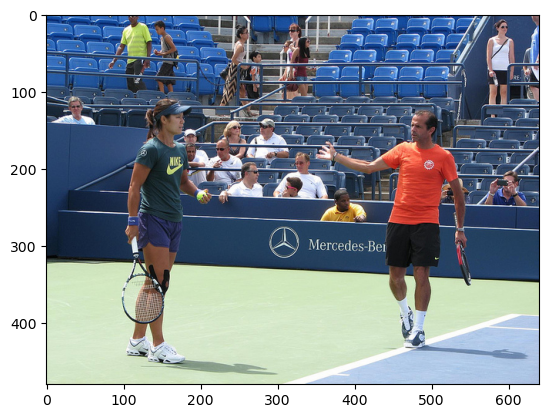

In [10]:
# show origin image
img = read_image(coco_dir / data["file_name"], format="RGB")
plt.imshow(img)
plt.show()

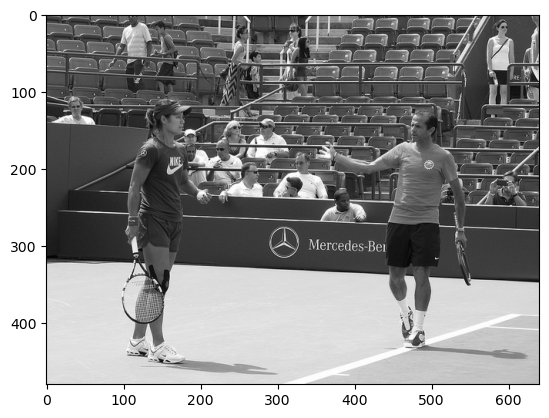

In [11]:
g_img = Image.open(coco_dir / data["file_name"]).convert('LA')
plt.imshow(g_img)
plt.show()

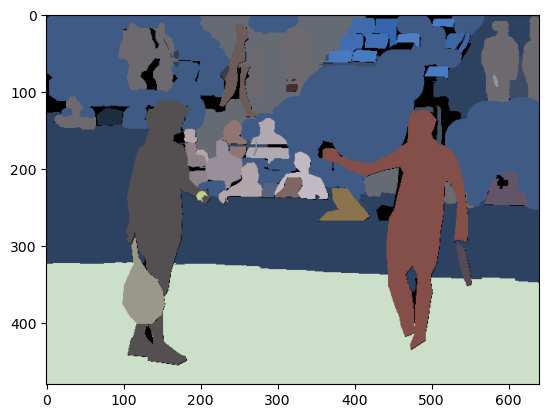

Segments IDs:  [       0  3223112  4140575  4406841  4669242  4804228  5075850  5394516
  5523801  5856364  6308396  6572861  6645374  6705732  6771812  7301741
  7370129  7498342  7957356  8283221  8673855  9017498  9143182  9294526
  9997707 10194840 10392727 10839870 11183795 11232308 11315124 11365183
 11577777 11693633 11890496 12548680 12680009 12745544 12761794 12811854
 12876357 13230027]
Segments Annotations: 
[{'area': 928, 'category_id': 0, 'id': 7370129, 'iscrowd': 0, 'isthing': 1},
 {'area': 381, 'category_id': 0, 'id': 11315124, 'iscrowd': 0, 'isthing': 1},
 {'area': 1570,
  'attribute_ids': [],
  'category_id': 0,
  'gqa_category_id': 868,
  'id': 5075850,
  'iscrowd': 0,
  'isthing': 1},
 {'area': 940, 'category_id': 0, 'id': 9143182, 'iscrowd': 0, 'isthing': 1},
 {'area': 1637, 'category_id': 0, 'id': 11577777, 'iscrowd': 0, 'isthing': 1},
 {'area': 1523,
  'attribute_ids': [],
  'category_id': 0,
  'gqa_category_id': 1084,
  'id': 6771812,
  'iscrowd': 0,
  'isthing':

In [12]:
# show segments image
seg_map = read_image(coco_dir / data["pan_seg_file_name"], format="RGB")
plt.imshow(seg_map)
plt.show()
# show seg annotations
seg_map = rgb2id(seg_map)
print('Segments IDs: ', np.unique(seg_map))
print('Segments Annotations: ')
pprint.pprint(data["segments_info"])

In [13]:
# get seperate masks
masks = []
labels_coco = []
for i, s in enumerate(data["segments_info"]):
    label = psg_obj_cats[s["category_id"]]
    labels_coco.append(label)
    masks.append(seg_map == s["id"])

In [14]:
# generate colormap for masks
colormap_coco = get_colormap(len(data["segments_info"]))
colormap_coco = (np.array(colormap_coco) / 255).tolist()

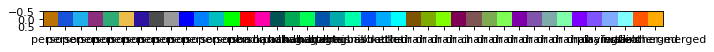

In [15]:
# show label and corresponding color
plt.figure(figsize=(10, 4), dpi=80)
plt.xticks(range(len(labels_coco)), labels_coco, fontsize=10)
plt.imshow(np.array(colormap_coco).reshape(1,-1,3))
plt.show()

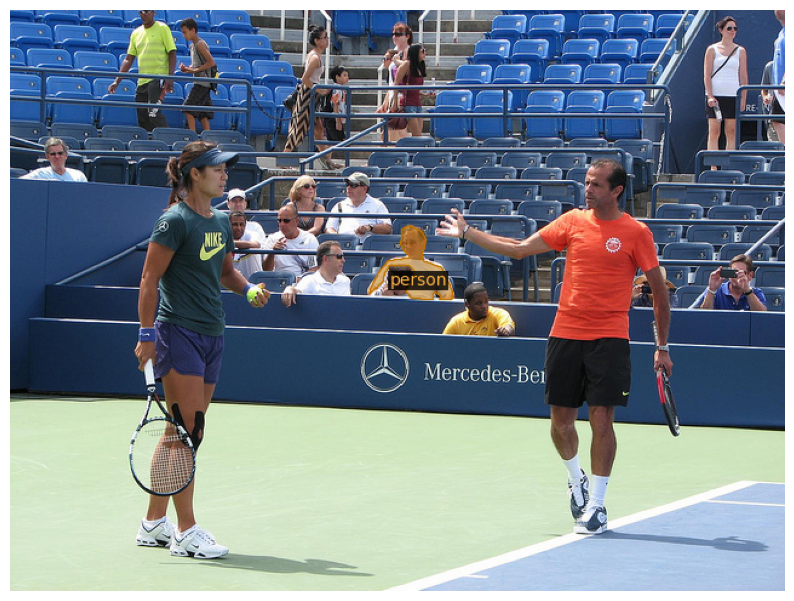

In [16]:
from openpsg.utils.vis_tools.detectron_viz import Visualizer
from detectron2.utils.visualizer import ColorMode

viz = Visualizer(img)
out = viz.overlay_instances(
    labels=[labels_coco[10]],
    masks=[masks[10]],
    assigned_colors=colormap_coco,
)
viz_img = out.get_image()

plt.figure(figsize=(10,10))
plt.imshow(viz_img)
plt.axis('off')
plt.show()

In [17]:
# show triplets
for s_idx, o_idx, rel_id in data["relations"]:
    s_label = labels_coco[s_idx]
    o_label = labels_coco[o_idx]
    rel_label = psg_rel_cats[rel_id]
    print(s_label, rel_label, o_label)

person holding sports ball
person holding tennis racket
person standing on playingfield
person holding tennis racket
person walking on chair


In [18]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import cv2

img = read_image('/home/mingzhe/Projects/OpenPSG/ce7454/data/coco/train2017/000000002842.jpg', format="RGB")

height, width, channels = img.shape

hsv = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

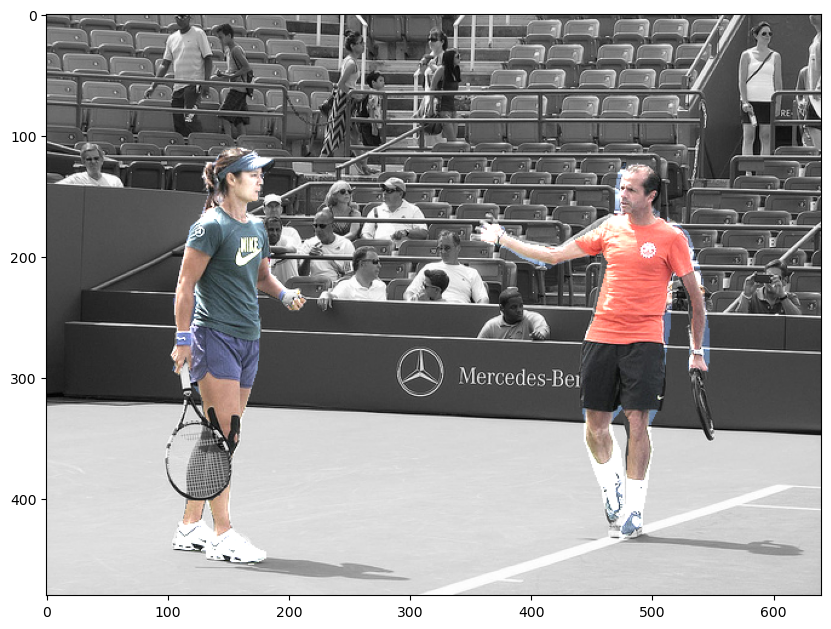

In [20]:
mask = (1 * np.logical_or(masks[7], masks[8])).astype('uint8')
mask_inv = cv2.bitwise_not(mask)

# Filter only the red colour from the original image using the mask(foreground)
res = cv2.bitwise_and(img, img, mask=mask)
# Filter the regions containing colours other than red from the grayscale image(background)
background = cv2.bitwise_and(gray, gray, mask = mask_inv)
# convert the one channelled grayscale background to a three channelled image
background = np.stack((background,)*3, axis=-1)
# add the foreground and the background
img_ca = cv2.add(res, background)

plt.figure(figsize=(10,10))
plt.imshow(img_ca)
plt.show()